In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
n = 100
p = 1000
n_groups = int(p)
alpha = 1.0
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(n, p, n_groups).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [4]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [5]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 628 ms, sys: 177 ms, total: 806 ms
Wall time: 472 ms


In [6]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 571 ms, sys: 0 ns, total: 571 ms
Wall time: 570 ms


In [7]:
A = np.asfortranarray(X.T @ X)

In [8]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 362 ms, sys: 1.01 ms, total: 363 ms
Wall time: 363 ms


In [9]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.08131308, 0.15725957, 0.226836  , 0.29047159,
        0.34865858, 0.40295192, 0.45276435, 0.49829878, 0.53980991,
        0.57763632, 0.61210232, 0.64362671, 0.67247673, 0.69881624,
        0.72302683, 0.74531296, 0.76567469, 0.78423932, 0.80122518,
        0.81670112, 0.83081985, 0.84371718, 0.85548493, 0.86615824,
        0.87588536, 0.88474871, 0.89289876, 0.90037531, 0.90728052,
        0.91359094, 0.91934049, 0.92463475, 0.92947364, 0.9338825 ,
        0.93791845, 0.94160245, 0.94515591, 0.94844066, 0.95145724,
        0.95420378, 0.95670551, 0.95900754, 0.96113837, 0.96307864,
        0.96486942, 0.96653912, 0.96810618, 0.96957842, 0.97092492,
        0.97215339, 0.97328656, 0.97430835, 0.97524147, 0.97608032,
        0.97683876, 0.97752976, 0.97815918, 0.97874064, 0.97927529,
        0.97977538, 0.9802417 , 0.98066898, 0.98106015, 0.98141979,
        0.98174899, 0.98204812, 0.98232198, 0.98258806, 0.98282876,
        0.98304895, 0.98324851, 0.98342955, 0.98

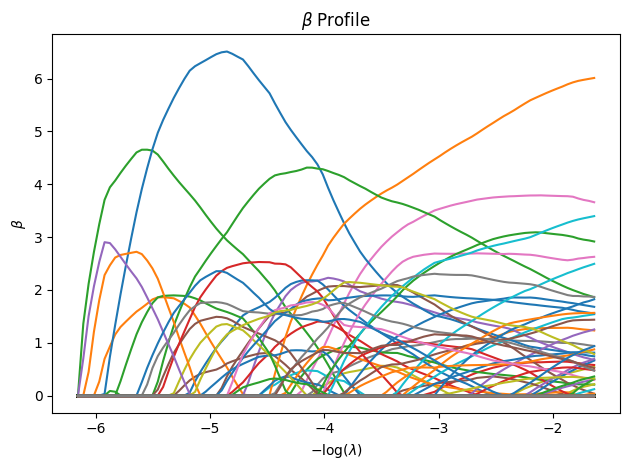

In [13]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(1/gl_out['lmdas'], gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [11]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(2.934053000558379e-11, 2.934053000558379e-11)